In [1]:
import os
import sys
import pandas as pd
import yaml 
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
from matplotlib import colors as mcolors
from matplotlib import patches as mpatches
import statsmodels.api as sm
import numpy as np
from itertools import product
import subprocess
import networkx as nx


with open("../../config.yaml.local", "r") as f:
    LOCAL_CONFIG = yaml.safe_load(f)
with open("../../config.yaml", "r") as f:
    CONFIG = yaml.safe_load(f)
sys.path.append("../python")

import globals
import data_tools as dt
import utils

LOCAL_PATH = LOCAL_CONFIG["LOCAL_PATH"]
RAW_DATA_PATH = LOCAL_CONFIG["RAW_DATA_PATH"]
DATA_PATH = LOCAL_CONFIG["DATA_PATH"]
R_PATH = LOCAL_CONFIG["R_PATH"]

RUN_R_SCRIPTS = False
OVERWRITE = False


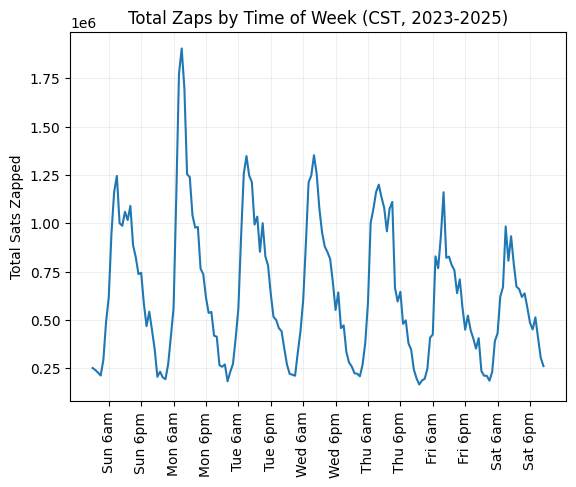

In [2]:
zaps = dt.get_zaps()

# Convert to Austin Timezone
zaps['zap_time'] = zaps['zap_time'].dt.tz_convert('America/Chicago')

# Get day of week / hour
zaps['time_from_week_start'] = zaps['zap_time'].dt.dayofweek * 24 + zaps['zap_time'].dt.hour

# Drop outliers
zaps = zaps.loc[zaps['sats'] <= zaps['sats'].quantile(0.9999)].reset_index(drop=True)

# Plot
plot_df = zaps.loc[
    (zaps['zap_time'].dt.year >= 2023)
].groupby('time_from_week_start').agg(
    total_sats = ('sats', 'sum')
).reset_index()

plt.plot(plot_df['time_from_week_start'], plot_df['total_sats'])
plt.xticks(
    [6, 18, 30, 42, 54, 66, 78, 90, 102, 114, 126, 138, 150, 162],
    ['Sun 6am', 'Sun 6pm', 'Mon 6am', 'Mon 6pm', 'Tue 6am', 'Tue 6pm', 'Wed 6am', 'Wed 6pm', 'Thu 6am', 'Thu 6pm', 'Fri 6am', 'Fri 6pm', 'Sat 6am', 'Sat 6pm'],
    rotation=90
)
plt.grid(alpha=0.2)
plt.ylabel('Total Sats Zapped')
plt.title('Total Zaps by Time of Week (CST, 2023-2025)')
plt.show()


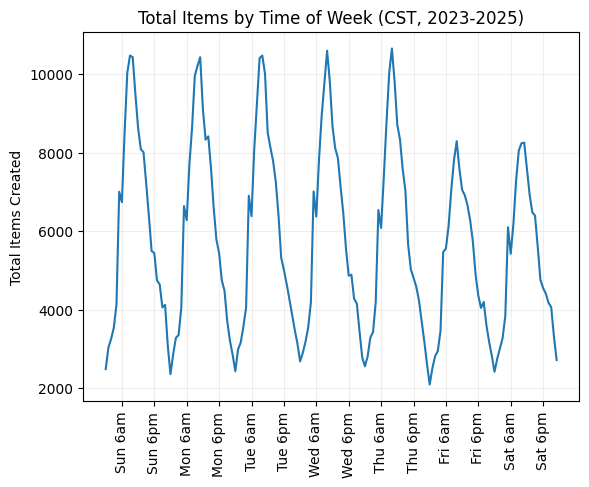

In [3]:
items = dt.get_items()

items = items.loc[
    (items['invoiceActionState']!='FAILED') & (items['userId']!=globals.spammer_id)
].reset_index(drop=True)

# Convert to Austin Timezone
items['created_at'] = items['created_at'].dt.tz_convert('America/Chicago')

# Get day of week / hour
items['time_from_week_start'] = items['created_at'].dt.dayofweek * 24 + items['created_at'].dt.hour

# Plot
plot_df = items.loc[
    (items['created_at'].dt.year >= 2023)
].groupby('time_from_week_start').agg(
    total_items = ('itemId', 'count')
).reset_index()

plt.plot(plot_df['time_from_week_start'], plot_df['total_items'])
plt.xticks(
    [6, 18, 30, 42, 54, 66, 78, 90, 102, 114, 126, 138, 150, 162],
    ['Sun 6am', 'Sun 6pm', 'Mon 6am', 'Mon 6pm', 'Tue 6am', 'Tue 6pm', 'Wed 6am', 'Wed 6pm', 'Thu 6am', 'Thu 6pm', 'Fri 6am', 'Fri 6pm', 'Sat 6am', 'Sat 6pm'],
    rotation=90
)
plt.grid(alpha=0.2)
plt.ylabel('Total Items Created')
plt.title('Total Items by Time of Week (CST, 2023-2025)')
plt.show()


In [4]:
items['invoiceActionState'].value_counts()

invoiceActionState
PAID    39025
Name: count, dtype: int64